In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [153]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv')

In [154]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [155]:
df.shape

(571, 43)

In [156]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [158]:
df.describe

<bound method NDFrame.describe of      Seat No. PH-121 HS-101 CY-105 HS-105/12 MT-111 CS-105 CS-106 EL-102  \
0    CS-97001     B-     D+     C-         C     C-     D+      D     C-   
1    CS-97002      A      D     D+         D     B-      C      D      A   
2    CS-97003      A      B      A        B-     B+      A     B-     B+   
3    CS-97004      D     C+     D+         D      D     A-     D+     C-   
4    CS-97005     A-     A-     A-        B+      A      A     A-     B+   
..        ...    ...    ...    ...       ...    ...    ...    ...    ...   
566  CS-97567      B      A      A        A-     A+      A     A-     A-   
567  CS-97568     A+      A      A         A      A      A      A     A-   
568  CS-97569      B      A     A-        B+      A      A      A      A   
569  CS-97570      A     B+      D         A      D     D+     B-     C-   
570  CS-97571      C      D      D         C      C     D+      B     C+   

    EE-119  ... CS-312 CS-317 CS-403 CS-421 CS-406 CS

In [159]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [160]:
df.corr()

C:\Users\erkai\AppData\Local\Temp\ipykernel_14684\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CGPA
CGPA,1.0


In [161]:
df = df.rename({'Seat No.':'Seat no', 'CGPA':'CGPA' },axis =1)

In [162]:
df

,Seat no,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


# Visualization

C:\Users\erkai\AppData\Local\Temp\ipykernel_14684\798984296.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CGPA"])


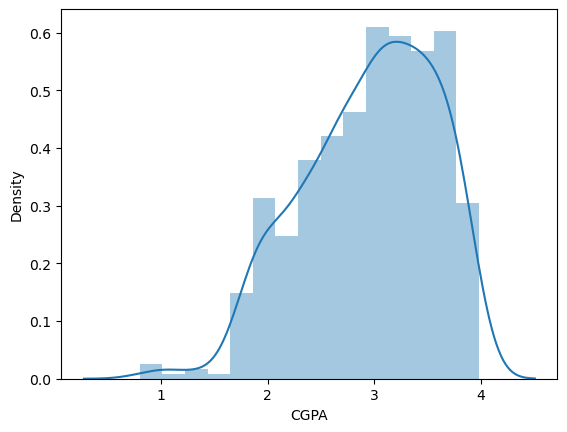

C:\Users\erkai\AppData\Local\Temp\ipykernel_14684\798984296.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CGPA"], kde=False, rug=True)


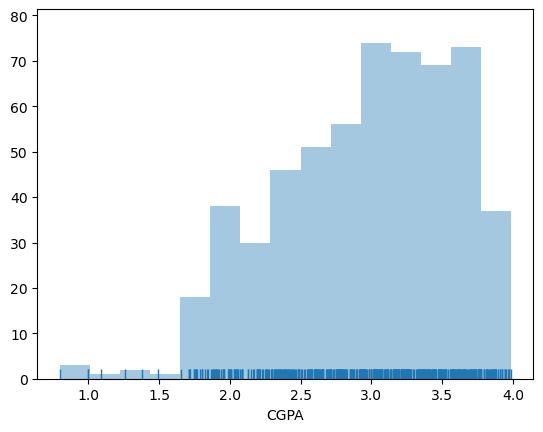

In [163]:
sns.distplot(df["CGPA"])
plt.show()

sns.distplot(df["CGPA"], kde=False, rug=True)
plt.show()

# Drawing a joint plot bwtween Seat Number and CGPA


ValueError: Per-column arrays must each be 1-dimensional

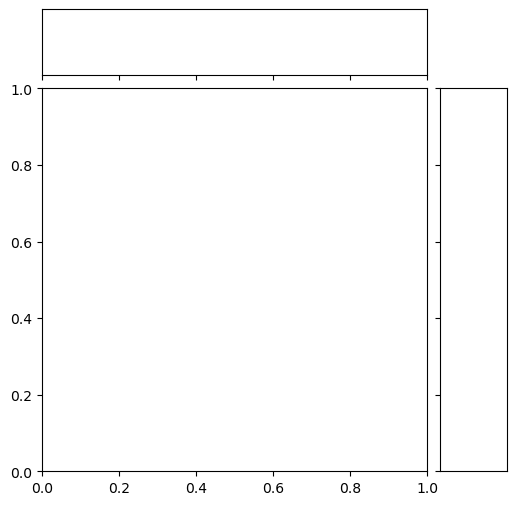

In [164]:
import seaborn as sns

sns.jointplot(x=df.values, y=df.index, alpha=0.8)
plt.show()


In [ ]:
sns.regplot(x="Seat no", y="CGPA", data=df)
plt.title("Ploting the regression line")

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv', sep=';')
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True)

In [167]:
df['Seat no'].describe()

count          571
unique         571
top       CS-97001
freq             1
Name: Seat no, dtype: object

In [168]:
#Plot between Seat No. and CGPA


plt.rcParams['figure.figsize'] = (15, 7)
plt.title('plot between Seat no and CGPA')
sns.scatterplot(x = df.Seat no, y = dfCGPA, hue = df.region, s = 200);

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Seat no')
plt.ylabel('CGPA')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3035918848.py, line 6)

In [179]:
CGPA.plot.pie(autopct = '%1.1f%%')
plt.title('CGPA BY STUDENT')
plt.ylabel('')

NameError: name 'CGPA' is not defined

In [176]:
df['CGPA'].describe()

count    571.000000
mean       2.954888
std        0.620552
min        0.800000
25%        2.538000
50%        3.029000
75%        3.451000
max        3.985000
Name: CGPA, dtype: float64

C:\Users\erkai\AppData\Local\Temp\ipykernel_14684\3703357230.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr(method = "pearson")
C:\Users\erkai\AppData\Local\Temp\ipykernel_14684\3703357230.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask = np.zeros_like(cor, dtype =np.bool),


<Axes: >

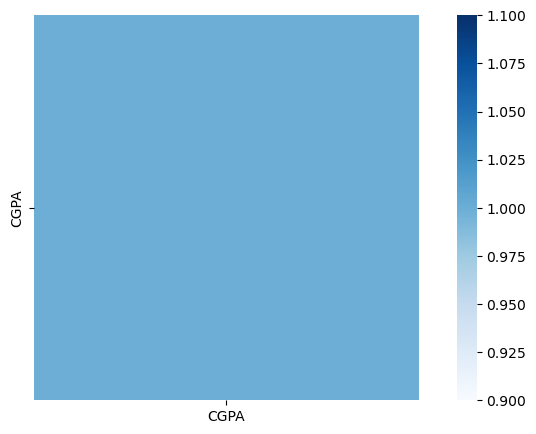

In [178]:
cor = df.corr(method = "pearson")
f, ax = plt.subplots(figsize = (10, 5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype =np.bool),
            cmap= "Blues", square=True, ax=ax)

In [182]:
Grade = df.groupby('Seat no')[['CGPA']].mean()
Grade

,CGPA
Seat no,
CS-97001,2.205
CS-97002,2.008
CS-97003,3.608
CS-97004,1.906
CS-97005,3.448
...,...
CS-97567,3.798
CS-97568,3.772
CS-97569,3.470


In [188]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.title('Perception of CCGPA in various Students')
plt.xlabel('Seat no', fontsize = 15)
plt.ylabel('CGPA', fontsize = 15)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(Seat no.index, Seat no.CGPA)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1216838502.py, line 6)

In [189]:
top_10 = df.head(10)
bottom_10 = df.tail(10)

In [192]:
fig, axes = plt.subplots(1, 2, figsize= (16, 6))
plt.tight_layout(pad= 2)
xlabel = top_10.CGPA
axes[0].set_title('Top 10 highest grade')
axes[0].set_xticklabels(xlabel, rotation=45, ha='right')
sns.barplot(x= top_10.CGPA, y=top_10.Seat no, ax=axes[0])
axes[0].set_xlabel('CGPA')
axes[0].set_ylabel('Seat no')

xlabels= bottom_10.country_name
axes[1].set_title('Bottom 10 least grade')
axes[1].set_xticklabels(xlabel, rotation = 45, ha='right')
sns.barplot(x= bottom_10.CGPA, y= bottom_10.Seat no, ax=axes[1])
axes[1].set_xlabel('CGPA')
axes[1].set_ylabel('Seat no')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2490751961.py, line 6)

In [193]:
CGPA = df.sort_values(by= 'Seat no').head(10)
plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Student with highest grade')
plt.xlabel('CGPA', fontsize = 13)
plt.ylabel('Seat no', fontsize= 13)
plt.xticks(rotation = 30, ha= 'right')
plt.bar(CGPA.CGPA,  CGPA.Seat no)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (273894311.py, line 7)

ValueError: boxplot method requires numerical columns, nothing to plot.

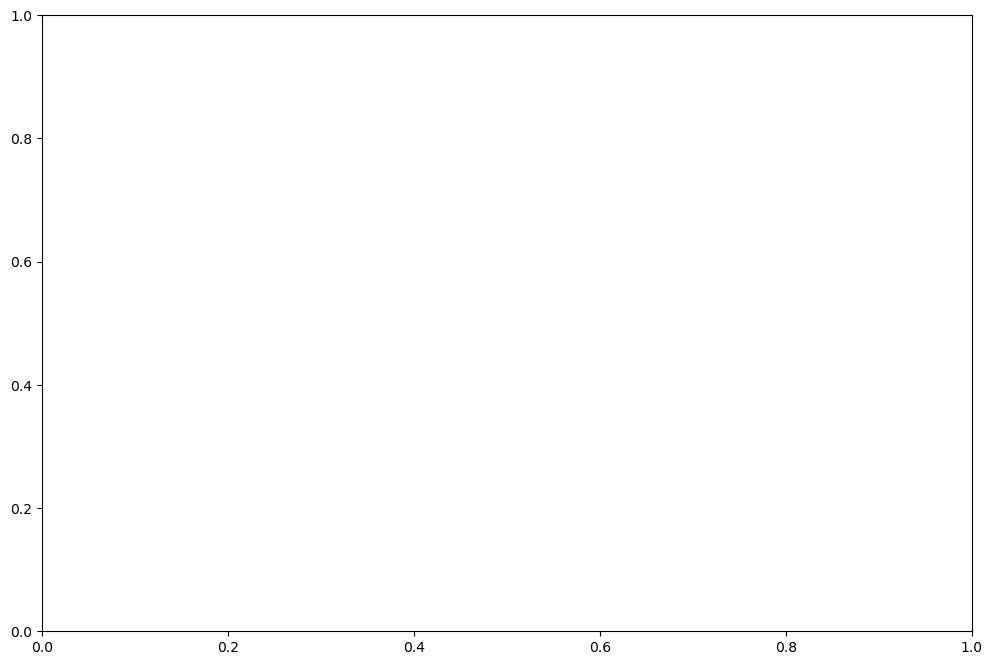

In [199]:
for i in df.columns:
    df[[i]].boxplot()
    plt.show()

In [211]:
x=df.drop("ph-121", "HS-101", "CV-105",  axis=1)
y=df['ph-121', 'HS-101', 'CV-105']
x.head()

C:\Users\erkai\AppData\Local\Temp\ipykernel_14684\207206357.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=df.drop("ph-121", "HS-101", "CV-105",  axis=1)


TypeError: DataFrame.drop() got multiple values for argument 'axis'

In [212]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [213]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [214]:
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

In [215]:
dtr=DecisionTreeRegressor(random_state =42)
dtr.fit(x_train, y_train)

ValueError: could not convert string to float: 'CS-97150'

In [216]:
y_train_pred=dtr.predict(x_train)
y_test_pred=dtr.predict(x_test)

ValueError: could not convert string to float: 'CS-97150'

In [217]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [218]:
rtr=RandomForestRegressor(n_estimators=100,random_state=42)
rtr.fit(x_train,y_train)

ValueError: could not convert string to float: 'CS-97150'

In [219]:
xg_reg=xgb.XGBRegressor()

In [220]:
xg_reg.fit(x_train,y_train)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Seat no: object, PH-121: object, HS-101: object, CY-105: object, HS-105/12: object, MT-111: object, CS-105: object, CS-106: object, EL-102: object, EE-119: object, ME-107: object, CS-107: object, HS-205/20: object, MT-222: object, EE-222: object, MT-224: object, CS-210: object, CS-211: object, CS-203: object, CS-214: object, EE-217: object, CS-212: object, CS-215: object, MT-331: object, EF-303: object, HS-304: object, CS-301: object, CS-302: object, TC-383: object, MT-442: object, EL-332: object, CS-318: object, CS-306: object, CS-312: object, CS-317: object, CS-403: object, CS-421: object, CS-406: object, CS-414: object, CS-419: object, CS-423: object, CS-412: object

In [221]:
y_train_pred2=xg_reg.predict(x_train)
y_test_pred2=xg_reg.predict(x_test)

NotFittedError: need to call fit or load_model beforehand